In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import Data

data,sta,date,lon,lat,P,d,t,s,Tr,fluo,oxy_uM,oxy_mL,rho,isop,si,ti,NO3_1,NO3_2,PO3_1,PO3_2,SiO4_1,SiO4_2,nut = Data.AllData_variables()
PaThData,PaTh_sta,PaTh_lon,PaTh_lat,PaTh_t,PaTh_s,PaTh_rho,PaTh_d = Data.PaTh_variables()
listAllSta,listPaThSta,PaThDataSorted,PaThSort_sta,PaThSort_d,Pa,Th,PaTh,PaErr,ThErr,PaThErr = Data.PaTh_varSorted()

/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


354.0 13.0


/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/DerivVar.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  isop = np.zeros((ydim,xdim))
/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


354.0 13.0
354.0 13.0


/home/mgrenier/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.


354.0 13.0


In [3]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.figure as mfig
#import seawater.gibbs as gsw

import netCDF4 as nc
import numpy as np
import scipy.io as sio
import pandas as pd
import pickle as pl
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

from salishsea_tools import nc_tools
from salishsea_tools import viz_tools
from salishsea_tools import  psu_tools

from matplotlib.pyplot import *
#from seabird.cnv import fCNV

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [4]:
#dir()
#locals()
#globals()

# All stations

In [5]:
'''
figx = pl.load(open('PaThStationsGreyPal_Map.pickle', 'rb'))
figx.show()
'''

"\nfigx = pl.load(open('PaThStationsGreyPal_Map.pickle', 'rb'))\nfigx.show()\n"

In [6]:
from wand.image import Image as WImage
img= WImage(filename='/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/Figures/PaThStationsColor_Map.png')
#img


In [7]:
#im = plt.imread('/ocean/mgrenier/geotraces/research/Geotraces2015data/PaThStationsGreyPal_Map.png') #I want to add a pdf if possible!
#plt.imshow(im)

In [8]:
si,ti,isop
s.min(),s.max()
#clabel?
listPaThSta

['K1',
 'LS2',
 'BB1',
 'BB3',
 'BB2',
 'CB2',
 'CB3',
 'CB4',
 '308/CAA8',
 'KC 500-2007',
 'KC 2000-2007',
 'KC 2700-2007',
 'A01-95',
 'L1.1-2009',
 'L2-2009',
 'L3-2009',
 '2',
 '93']

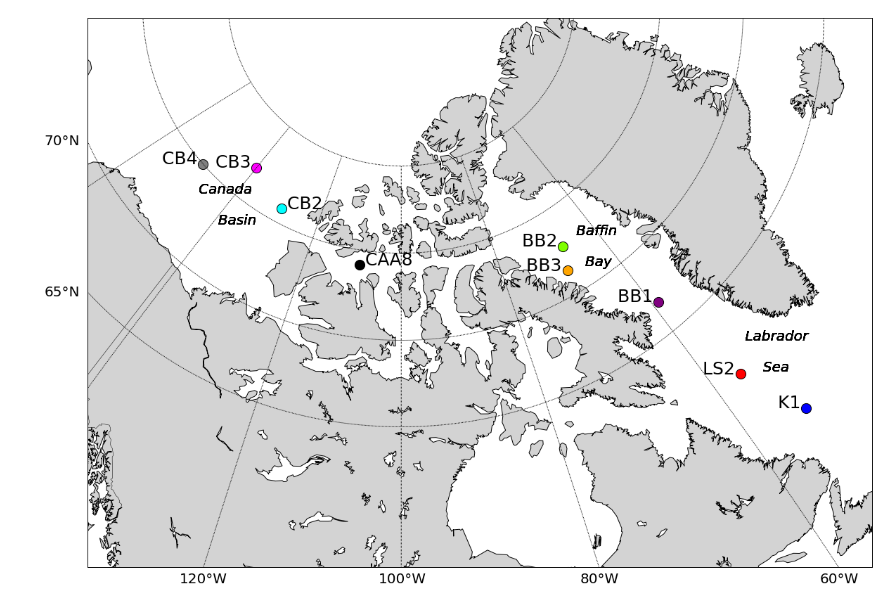

In [9]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(15,15))
img=plt.imread('/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/Figures/PaThStationsColor_Map.png')
ax.imshow(img);
plt.axis('off');

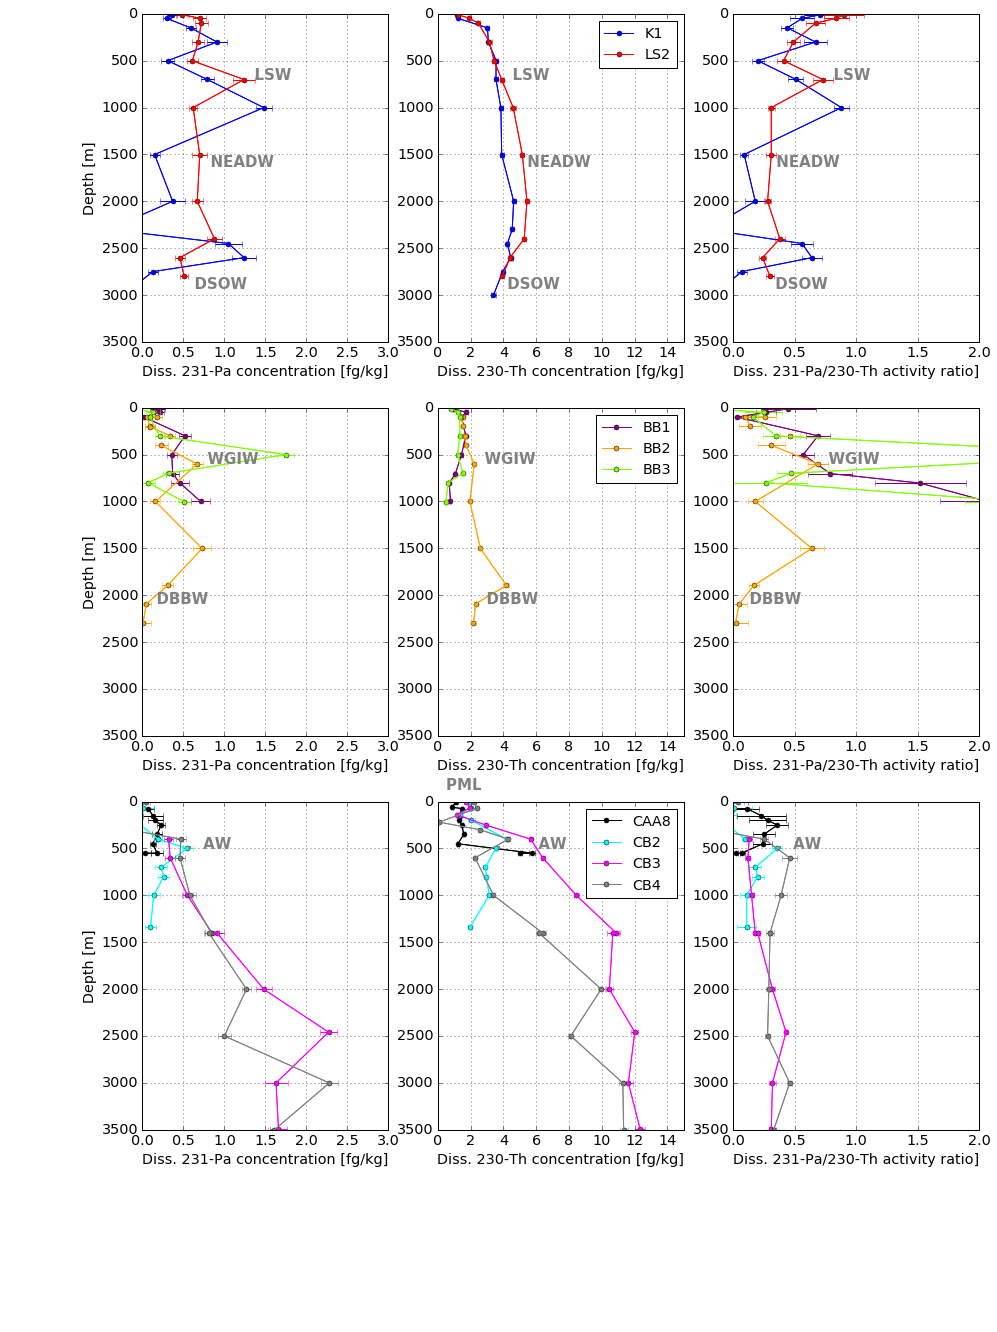

In [41]:
import matplotlib.pyplot as plt

fig,((ax1, ax2,ax3), (ax4,ax5, ax6),(ax7,ax8,ax9))=plt.subplots(3,3,facecolor='w',figsize=(15,20))


for station,name,M,S,C in zip(('K1','LS2'),
                              ('K1','LS2'),
                              ('o-','o-'),
                              (5,5),('blue','red')):
    for ax,xfield,yfield,XERR,xlabels,ylabels,xranges,yranges in zip((ax1,ax2,ax3),
                                                                    (Pa,Th,PaTh),
                                                                    (PaThSort_d,PaThSort_d,PaThSort_d),
                                                                    (PaErr,ThErr,PaThErr),
                                                                    ('Diss. 231-Pa concentration [fg/kg]',
                                                                     'Diss. 230-Th concentration [fg/kg]',
                                                                     'Diss. 231-Pa/230-Th activity ratio]'),
                                                                    ('Depth [m]','',''),
                                                                    ([0,3],[0, 15],[0,2]),
                                                                    ([0,3500],[0, 3500],[0,3500])):
        ax.plot(xfield[PaThSort_sta == station],yfield[PaThSort_sta == station],M,markersize=S,color=C,label=name)
        ax.errorbar(xfield[PaThSort_sta == station],yfield[PaThSort_sta == station],xerr=XERR[PaThSort_sta == station].tolist(),color=C)
        ax.set_xlim(xranges)
        ax.set_ylim(yranges)
        ax.set_xlabel(xlabels)
        ax.set_ylabel(ylabels)
        ax.invert_yaxis()

for station,name,M,S,C in zip(('BB1','BB2','BB3'),
                              ('BB1','BB2','BB3'),
                              ('o-','o-','o-'),
                              (5,5,5),('purple','orange','chartreuse')):
    for ax,xfield,yfield,XERR,xlabels,ylabels,xranges,yranges in zip((ax4,ax5,ax6),
                                                                    (Pa,Th,PaTh),
                                                                    (PaThSort_d,PaThSort_d,PaThSort_d),
                                                                    (PaErr,ThErr,PaThErr),
                                                                    ('Diss. 231-Pa concentration [fg/kg]',
                                                                     'Diss. 230-Th concentration [fg/kg]',
                                                                     'Diss. 231-Pa/230-Th activity ratio]'),
                                                                    ('Depth [m]','',''),
                                                                    ([0,3],[0, 15],[0,2]),
                                                                    ([0,3500],[0, 3500],[0,3500])):
        ax.plot(xfield[PaThSort_sta == station],yfield[PaThSort_sta == station],M,markersize=S,color=C,label=name)
        ax.errorbar(xfield[PaThSort_sta == station],yfield[PaThSort_sta == station],xerr=XERR[PaThSort_sta == station].tolist(),color=C)
        ax.set_xlim(xranges)
        ax.set_ylim(yranges)
        ax.set_xlabel(xlabels)
        ax.set_ylabel(ylabels)
        ax.invert_yaxis()

for station,name,M,S,C in zip(('308/CAA8','CB2','CB3','CB4'),
                              ('CAA8','CB2','CB3','CB4'),
                              ('o-','o-','o-','o-'),
                              (5,5,5,5),('black','aqua','magenta','grey')):
    for ax,xfield,yfield,XERR,xlabels,ylabels,xranges,yranges in zip((ax7,ax8,ax9),
                                                                    (Pa,Th,PaTh),
                                                                    (PaThSort_d,PaThSort_d,PaThSort_d),
                                                                    (PaErr,ThErr,PaThErr),
                                                                    ('Diss. 231-Pa concentration [fg/kg]',
                                                                     'Diss. 230-Th concentration [fg/kg]',
                                                                     'Diss. 231-Pa/230-Th activity ratio]'),
                                                                    ('Depth [m]','',''),
                                                                    ([0,3],[0, 15],[0,2]),
                                                                    ([0,3500],[0, 3500],[0,3500])):
        ax.plot(xfield[PaThSort_sta == station],yfield[PaThSort_sta == station],M,markersize=S,color=C,label=name)
        ax.errorbar(xfield[PaThSort_sta == station],yfield[PaThSort_sta == station],xerr=XERR[PaThSort_sta == station].tolist(),color=C)
        ax.set_xlim(xranges)
        ax.set_ylim(yranges)
        ax.set_xlabel(xlabels)
        ax.set_ylabel(ylabels)
        ax.invert_yaxis()

# Water mass identification
# 0-300 m
PML = PaThDataSorted[(PaThSort_sta == 'CB3') & (PaThSort_d > 5) & (PaThSort_d < 25)] # Polar Mixed Layer
ArcW = data[(sta == 'BB2') & (data.Cast == 18.0) & (P == 150)] # Arctic Water
UHL = PaThDataSorted[(PaThSort_sta == 'CB3') & (PaThSort_d > 120) & (PaThSort_d < 150)] # Lower Halocline Layer
LHL = PaThDataSorted[(PaThSort_sta == 'CB3') & (PaThSort_d > 230) & (PaThSort_d < 270)] # Lower Halocline Layer
# 300-1000 m
AW = PaThDataSorted[(PaThSort_sta == 'CB2') & (PaThSort_d > 450) & (PaThSort_d < 550)] # Atlantic Water
WGIW = PaThDataSorted[(PaThSort_sta == 'BB2') & (PaThSort_d > 550) & (PaThSort_d < 650)] # West Greenland Intermediate Water
LSW = PaThDataSorted[(PaThSort_sta == 'LS2') & (PaThSort_d > 650) & (PaThSort_d < 750)] # Labrador Sea Water
# 1000-3500 m
DBBW = PaThDataSorted[(PaThSort_sta == 'BB2') & (PaThSort_d > 2000) & (PaThSort_d < 2200)] # Deep Baffin Bay Water
NEADW = PaThDataSorted[(PaThSort_sta == 'LS2') & (PaThSort_d > 1450) & (PaThSort_d < 1550)] # Northeast Atlantic Deep Water
DSOW = PaThDataSorted[(PaThSort_sta == 'LS2') & (PaThSort_d > 2700)] # Denmark Strait Overflow Water

# 0-300 m

for ax,xfield,yfield,pos in zip((ax7,ax8,ax9),(PML.Pa,PML.Th,PML.PaTh),
                            (PML.d,PML.d,PML.d),('left','center','left')
                            ):
    ax.annotate('PML \n\n',xy=(xfield,yfield),horizontalalignment=pos,verticalalignment='center',fontsize=15,color='0.5',fontweight='bold')

for ax,name,xfield,yfield,pos in zip((ax4,ax5,ax6),('ArcW','ArcW','ArcW'),(ArcW.Pa,ArcW.Th,ArcW.PaTh),
                            (ArcW.d,ArcW.d,ArcW.d),('left','left','left')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,fontsize=15,color='0.5',fontweight='bold')
'''
for ax,name,xfield,yfield,pos in zip((ax7,ax8,ax9),('. UHL','UHL .','. UHL'),(UHL.Pa,UHL.Th,UHL.PaTh),
                            (UHL.d,UHL.d,UHL.d),('left','left','left')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,verticalalignment='center',fontsize=15,color='0.5',fontweight='bold')

for ax,name,xfield,yfield in zip((ax7,ax8,ax9),('LHL  \n','LHL\n','LHL \n'),(LHL.Pa,LHL.Th,LHL.PaTh),
                            (LHL.d,LHL.d,LHL.d)
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment='left',verticalalignment='center',fontsize=15,color='0.5',fontweight='bold')
'''
# 300-1000 m

for ax,name,xfield,yfield,pos in zip((ax7,ax8,ax9),('.  AW','.       AW','.  AW'),(AW.Pa,AW.Th,AW.PaTh),
                            (AW.d,AW.d,AW.d),('left','left','left')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,fontsize=15,color='0.5',fontweight='bold')

for ax,name,xfield,yfield,pos in zip((ax4,ax5,ax6),('  WGIW','  WGIW','  WGIW'),(WGIW.Pa,WGIW.Th,WGIW.PaTh),
                            (WGIW.d,WGIW.d,WGIW.d),('left','left','left')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,fontsize=15,color='0.5',fontweight='bold')

    
for ax,name,xfield,yfield,pos in zip((ax1,ax2,ax3),('  LSW','  LSW','  LSW'),(LSW.Pa,LSW.Th,LSW.PaTh),
                            (LSW.d,LSW.d,LSW.d),('left','left','left')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,fontsize=15,color='0.5',fontweight='bold')

# 1000-3500 m

for ax,xfield,yfield in zip((ax4,ax5,ax6),
                            (DBBW.Pa,DBBW.Th,DBBW.PaTh),
                            (DBBW.d,DBBW.d,DBBW.d)
                            ):
    ax.annotate('  DBBW',xy=(xfield,yfield),horizontalalignment='left',fontsize=15,color='0.5',fontweight='bold')

for ax,name,xfield,yfield,pos in zip((ax1,ax2,ax3),('  NEADW',' NEADW',' NEADW'),(NEADW.Pa,NEADW.Th,NEADW.PaTh),
                            (NEADW.d,NEADW.d,NEADW.d),('left','left','left')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,verticalalignment='top', fontsize=15,color='0.5',fontweight='bold')


for ax,name,xfield,yfield,pos in zip((ax1,ax2,ax3),('  DSOW',' DSOW',' DSOW'),(DSOW.Pa,DSOW.Th,DSOW.PaTh),
                            (DSOW.d,DSOW.d,DSOW.d),('left','left','left')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,verticalalignment='top', fontsize=15,color='0.5',fontweight='bold')

    

for ax, in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9)):
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_axisbelow(True)
h2=0
h5=0
h8=0
l2=0
l5=0
l8=0
for ax,handles,labels,i in zip((ax2,ax5,ax8),(h2,h5,h8),(l2,l5,l8),(0,1,2)):

    handles, labels = ax.get_legend_handles_labels()

    ax.legend(handles[0:i+2],labels[0:i+2],loc='best',numpoints=1,framealpha=1,frameon=True)


#drawIsopycnals(nlevels = 6, levels, rotate = TRUE, rho1000 = FALSE,digits = 2, eos = getOption("oceEOS", default = "gsw"), cex = 0.75 * par("cex"), col = "darkgray", lwd = par("lwd"), lty = par("lty"))
savefig('Figures/PaThStationsColor_PaandThandPaThvsd-color.png',bbox_inches='tight')

plt.show()


In [38]:
'''handles, labels = ax1.get_legend_handles_labels()
len(handles)
labels[9:18],handles[9:18]
'''

'handles, labels = ax1.get_legend_handles_labels()\nlen(handles)\nlabels[9:18],handles[9:18]\n'